In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

<h2>Loading dataset</h2>
    

In [2]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(8425, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

**The Dataset Contains the following details**
* Number of columns: 23
* Number of rows:8425
* Number of Independent Columns: 21
* Number of Dependent Column: 2
* Dataset has two data types: float64, object

In [6]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


<h2>Exploratory Data Analysis

We'll start by checking out missing data!

Missing Data We can use seaborn to create a simple heatmap to see where we are missing data!

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In this Dataset Except for the Date, Location columns, every column has missing values.

In [8]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [9]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In this dataset Rain Tomorrow and Rainfall columns are the Dependent Variable and Rest of all are the columns are Independent Variable

<AxesSubplot:>

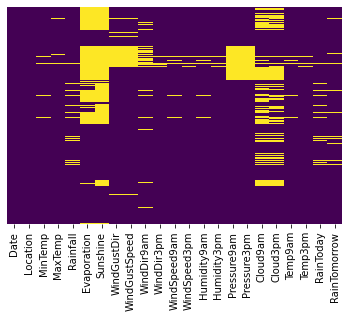

In [11]:
#missing data visualization using seaborn
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Here We can use seaborn to create a simple heatmap to identify the Missing Data in the Dataset

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

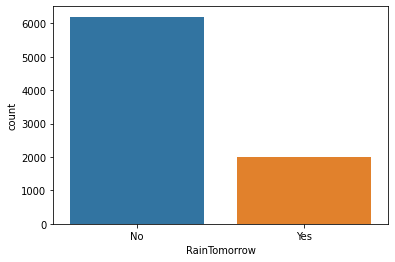

In [12]:
sns.countplot(df['RainTomorrow'])

<AxesSubplot:>

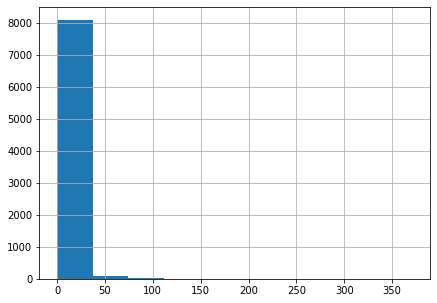

In [17]:
df['Rainfall'].hist(figsize=(7,5))

Our target variable Rainfall is highly skewed towards left.

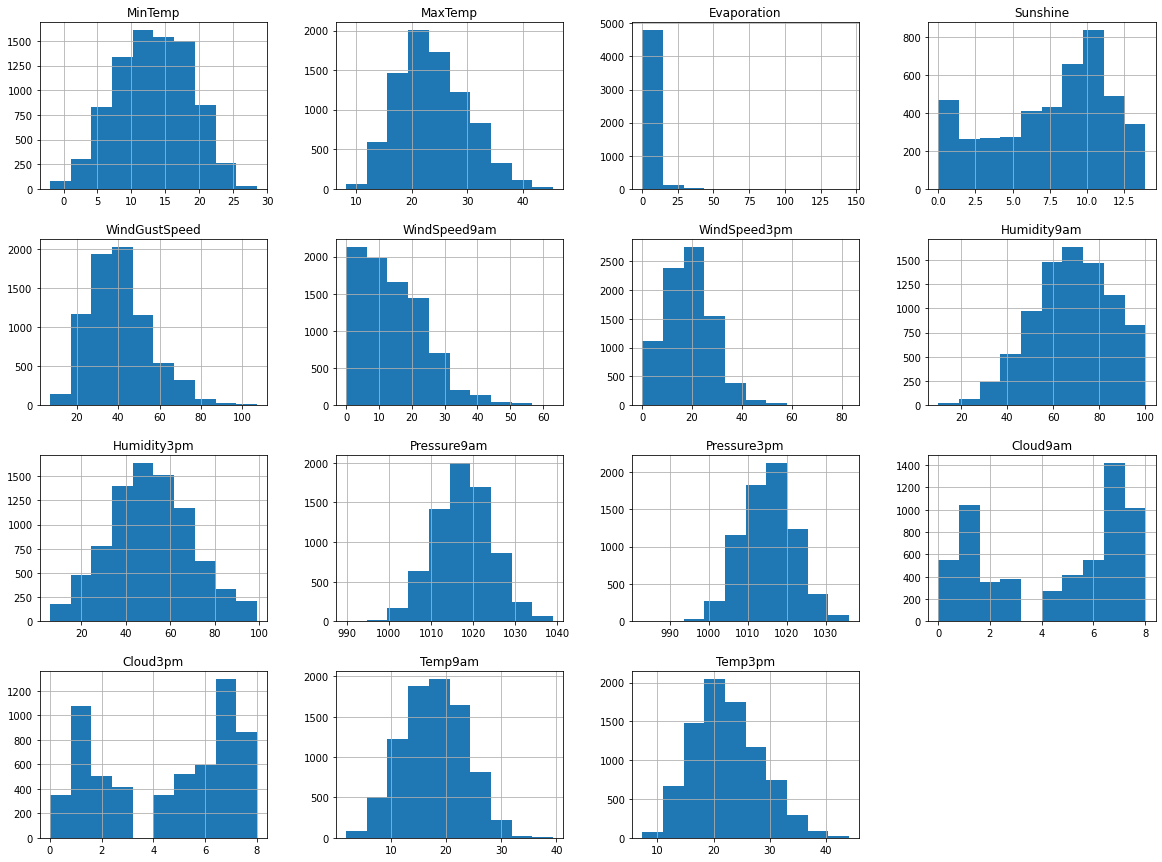

In [20]:
#ploting graph of numerical data
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df.drop('Rainfall',axis=1).hist(ax=ax)
plt.show()

<AxesSubplot:>

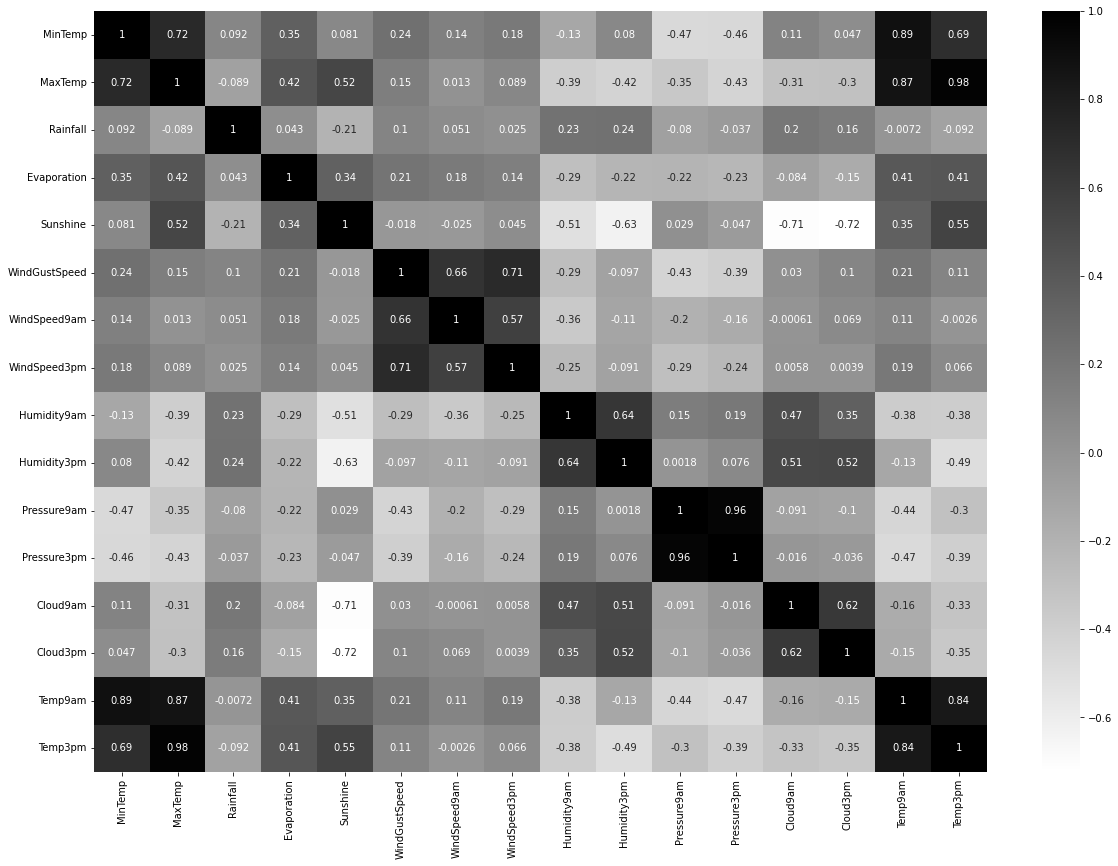

In [29]:
#to check correlation in data
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,cmap='gray_r')

<AxesSubplot:>

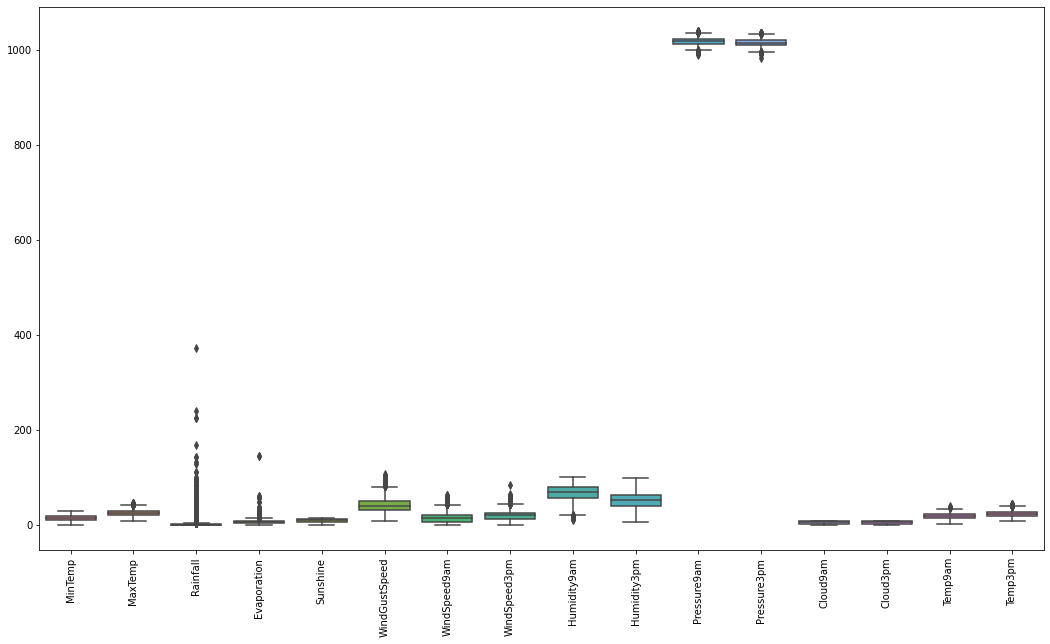

In [30]:
#finding outliers using box plot
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
sns.boxplot(data=df)

<h2>Data Cleaning

In [31]:
# To Drop the Date and Location Column 

df.drop(['Date','Location'],axis = 1, inplace = True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [32]:
#separting categorical and numerical features

categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
numerical_features=[column_name for column_name in df.columns if df[column_name].dtype != 'O']
print('Numeric:',numerical_features,'\n')
print('Categoric:',categorical_features)

Numeric: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'] 

Categoric: ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


After removing the date and Location here In this dataset total no of columns is 21 The ramaining columns are separated in two types

        1.Numeric (Numerical Features) 
        2.Categoric (Categorical Features)

<B>Finding outiers in nuerical cols

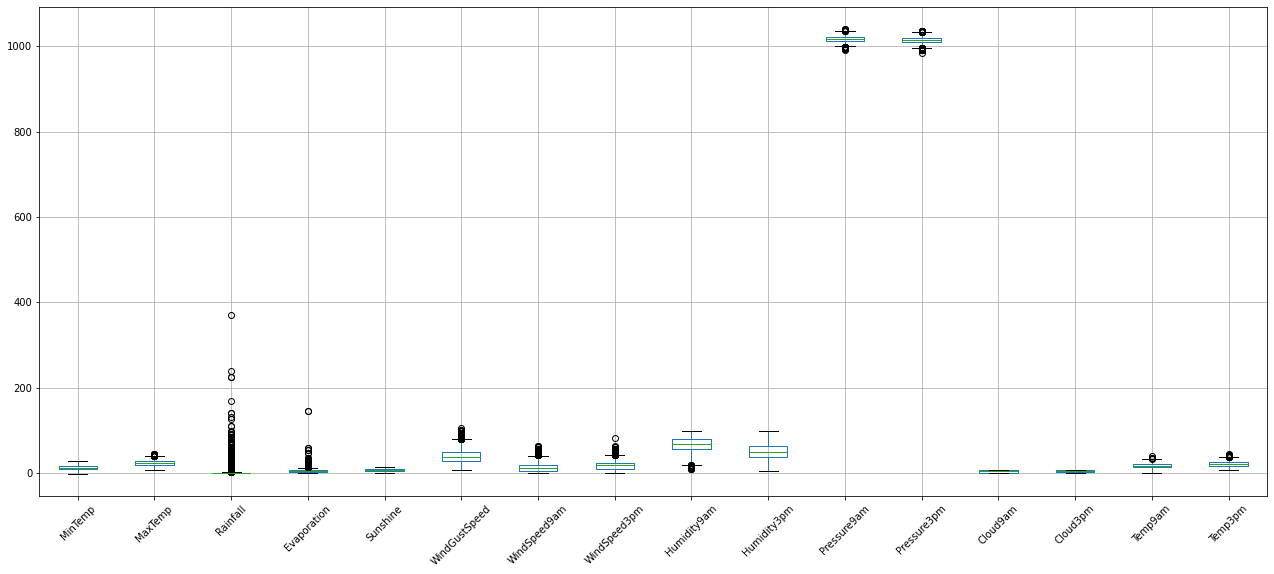

In [33]:
plt.figure(figsize=(22,9));
df.boxplot();
plt.xticks(rotation=45);

Here outliers are present in Rainfall, Evaporation, WindSpeed9am attributes. So we need to get the exact values of outliers using IQR method.

<b>Handling missing values

In [35]:
# Handling missing values or nan values

df.isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [36]:
# Handling NaN values in numerical cols

for  i in numerical_features:
    df[i] = df[i].fillna(df[i].mean())

In [37]:
df.isnull().sum()

MinTemp            0
MaxTemp            0
Rainfall           0
Evaporation        0
Sunshine           0
WindGustDir      991
WindGustSpeed      0
WindDir9am       829
WindDir3pm       308
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        240
RainTomorrow     239
dtype: int64

In this __Numerical Features Column__ null values are replaced with mean values

In [38]:
# Handling NaN values in categorical cols

for i in categorical_features:
    df[i] = df[i].fillna(df[i].mode()[0])

In [39]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In this __Categorical Features Column__ null values are replaced with mode Values.<br>
Now there are no null values are present in dataset.

<B>Finding number of outliers in each colm using IQR method

In [40]:
def detect_outliers_iqr(data):
    outlier_list = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list # Driver code



for i in numerical_features:
    outliers = detect_outliers_iqr(df[i])
    print("Number of Outliers in",i,"attribute :", len(outliers))

Number of Outliers in MinTemp attribute : 0
Number of Outliers in MaxTemp attribute : 37
Number of Outliers in Rainfall attribute : 1342
Number of Outliers in Evaporation attribute : 1729
Number of Outliers in Sunshine attribute : 2336
Number of Outliers in WindGustSpeed attribute : 217
Number of Outliers in WindSpeed9am attribute : 135
Number of Outliers in WindSpeed3pm attribute : 94
Number of Outliers in Humidity9am attribute : 22
Number of Outliers in Humidity3pm attribute : 0
Number of Outliers in Pressure9am attribute : 223
Number of Outliers in Pressure3pm attribute : 198
Number of Outliers in Cloud9am attribute : 0
Number of Outliers in Cloud3pm attribute : 0
Number of Outliers in Temp9am attribute : 5
Number of Outliers in Temp3pm attribute : 54


In [41]:
#Handling outliers in numerical features

def handle_outliers(data):

    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    b = np.where(data<lwr_bound, lwr_bound, data)

    b1 = np.where(b>upr_bound, upr_bound, b)
    return b1
    
    
for i in numerical_features:
    df[i]=handle_outliers(df[i])

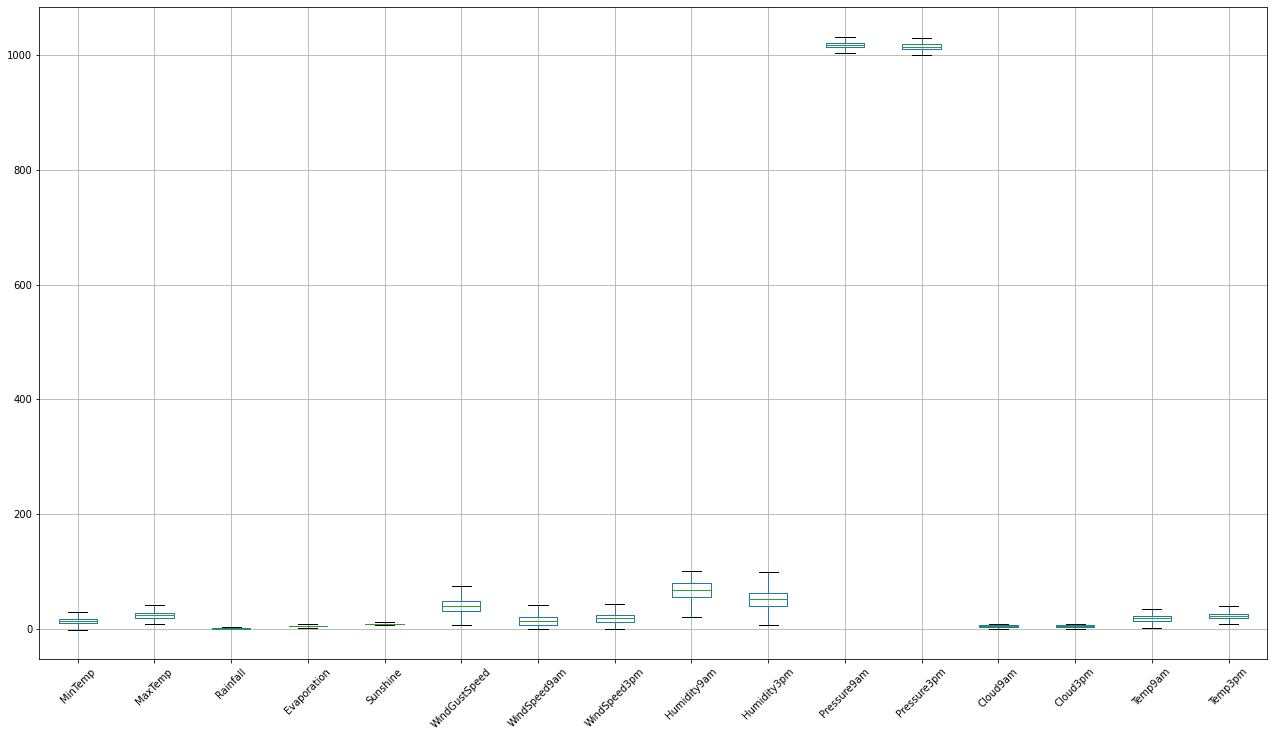

In [42]:
#checking if outliers are handled or not
plt.figure(figsize=(22,12));
df.boxplot();
plt.xticks(rotation=45);

Now there are no outliers are present in dataset.

In [43]:
#checking if there are any duplicates in dataset
df[df.duplicated()]  

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1737,13.193305,23.859976,0.000000,5.389395,7.632205,N,40.174469,N,SE,13.847646,...,67.822496,51.24979,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,No,No
1738,13.193305,23.859976,0.000000,5.389395,7.632205,N,40.174469,N,SE,13.847646,...,67.822496,51.24979,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,No,No
1814,13.193305,23.859976,2.805913,5.389395,7.632205,N,40.174469,N,SE,13.847646,...,67.822496,51.24979,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,No,No
1815,13.193305,23.859976,2.805913,5.389395,7.632205,N,40.174469,N,SE,13.847646,...,67.822496,51.24979,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,No,No
1816,13.193305,23.859976,2.805913,5.389395,7.632205,N,40.174469,N,SE,13.847646,...,67.822496,51.24979,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6143,20.300000,25.000000,0.000000,7.473489,7.300000,S,39.000000,S,SSW,17.000000,...,77.000000,60.00000,1015.200000,1014.000000,8.000000,2.000000,20.800000,23.800000,No,No
6144,16.100000,24.500000,0.000000,4.400000,10.801693,S,50.000000,S,S,13.000000,...,67.000000,55.00000,1018.500000,1016.900000,4.566622,4.503183,18.900000,23.700000,No,No
6145,16.600000,30.700000,2.805913,7.473489,10.801693,SSE,39.000000,WSW,SSE,9.000000,...,69.000000,55.00000,1016.900000,1013.500000,4.566622,4.503183,20.500000,26.300000,No,No
6146,20.000000,30.400000,2.805913,7.473489,10.801693,SSE,37.000000,SW,S,13.000000,...,64.000000,55.00000,1012.700000,1009.200000,4.566622,4.503183,24.100000,27.400000,No,No


Here __1673 rows__ are have an duplicated Values, so we have to drop these rows

In [44]:
df.drop_duplicates(inplace=True)
df.shape

(6752, 21)

After removing the duplicated values now our dataset have an 6752 rows and 21 columns are there.

**Now the dataset is cleaned**
* Handled outliers
* Handled NaN values
* Removed Duplicates

<h3>Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df[numerical_features]=scaler.fit_transform(df[numerical_features])
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.052325,-0.194673,-0.153605,0.236477,-0.273057,W,0.386336,W,WNW,0.762707,...,0.202717,-1.538399,-1.692487,-1.381121,1.452546,0.056374,-0.173508,-0.150445,No,No
1,-1.029855,0.164999,-0.598042,0.236477,-0.273057,WNW,0.386336,NNW,WSW,-0.913248,...,-1.371507,-1.376332,-1.198102,-1.260881,0.067238,0.056374,-0.121074,0.270197,No,No
2,-0.037857,0.263091,-0.598042,0.236477,-0.273057,WSW,0.540880,W,WSW,0.657960,...,-1.721335,-1.106221,-1.709535,-1.106286,0.067238,-1.019679,0.543092,0.085115,No,No
3,-0.705201,0.639111,-0.598042,0.236477,-0.273057,NE,-1.159104,SE,E,-0.180018,...,-1.313203,-1.862533,-0.004757,-0.402021,0.067238,0.056374,0.036229,0.640362,No,No
4,0.791814,1.342105,0.142686,0.236477,-0.273057,W,0.154520,ENE,NW,-0.599006,...,0.844068,-0.944154,-1.164006,-1.570070,1.049063,1.559565,-0.016206,1.178783,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,-1.859527,-0.112929,-0.598042,0.236477,-0.273057,E,-0.618200,SE,ENE,0.029477,...,-0.963375,-1.430355,1.188587,0.886268,0.067238,0.056374,-1.362015,-0.049491,No,No
8421,-1.715236,0.197696,-0.598042,0.236477,-0.273057,NNW,-1.313648,SE,N,0.029477,...,-0.671852,-1.592422,1.001061,0.680141,0.067238,0.056374,-1.222191,0.303848,No,No
8422,-1.390582,0.459275,-0.598042,0.236477,-0.273057,N,-0.154568,SE,WNW,-0.389512,...,-0.846766,-1.430355,0.574867,0.285066,0.067238,0.056374,-0.942542,0.573059,No,No
8423,-0.957710,0.475624,-0.598042,0.236477,-0.273057,SE,-0.850016,SSE,N,0.029477,...,-0.963375,-1.430355,0.302103,0.233535,-0.564867,-1.019679,-0.488113,0.556234,No,No


<h3>Encoding Categorical Features

Here Rain Today and Rain Tomorrow is the Categorical Features value, So we need to replace the Categorical features to numerical feature using replace function


In [46]:
# Encoding Categorical Features using replace function:

df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)

In [47]:
#function which takes feature name as a parameter and return mapping dictionary to replace(or map) 
#categorical data to numerical data.

def encode_data(categorical_features):
       
    mapping_dict = {}
    unique_values = list(df[categorical_features].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [48]:
df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

{'W': 0, 'WNW': 1, 'WSW': 2, 'NE': 3, 'NNW': 4, 'N': 5, 'NNE': 6, 'SW': 7, 'ENE': 8, 'SSE': 9, 'S': 10, 'NW': 11, 'SE': 12, 'ESE': 13, 'E': 14, 'SSW': 15}


In [49]:
df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

{'W': 0, 'NNW': 1, 'SE': 2, 'ENE': 3, 'SW': 4, 'SSE': 5, 'S': 6, 'NE': 7, 'N': 8, 'SSW': 9, 'WSW': 10, 'ESE': 11, 'E': 12, 'NW': 13, 'WNW': 14, 'NNE': 15}


In [50]:
df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

{'WNW': 0, 'WSW': 1, 'E': 2, 'NW': 3, 'W': 4, 'SSE': 5, 'ESE': 6, 'ENE': 7, 'NNW': 8, 'SSW': 9, 'SW': 10, 'SE': 11, 'N': 12, 'S': 13, 'NNE': 14, 'NE': 15}


In [51]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.052325,-0.194673,-0.153605,0.236477,-0.273057,0,0.386336,0,0,0.762707,...,0.202717,-1.538399,-1.692487,-1.381121,1.452546,0.056374,-0.173508,-0.150445,0,0
1,-1.029855,0.164999,-0.598042,0.236477,-0.273057,1,0.386336,1,1,-0.913248,...,-1.371507,-1.376332,-1.198102,-1.260881,0.067238,0.056374,-0.121074,0.270197,0,0
2,-0.037857,0.263091,-0.598042,0.236477,-0.273057,2,0.540880,0,1,0.657960,...,-1.721335,-1.106221,-1.709535,-1.106286,0.067238,-1.019679,0.543092,0.085115,0,0
3,-0.705201,0.639111,-0.598042,0.236477,-0.273057,3,-1.159104,2,2,-0.180018,...,-1.313203,-1.862533,-0.004757,-0.402021,0.067238,0.056374,0.036229,0.640362,0,0
4,0.791814,1.342105,0.142686,0.236477,-0.273057,0,0.154520,3,3,-0.599006,...,0.844068,-0.944154,-1.164006,-1.570070,1.049063,1.559565,-0.016206,1.178783,0,0


There are many feature encoding techniques like One hot encoding, label encoding. But in this particular project, I will be using replace() function to encode categorical data to numerical data.

<h2>Model Building
    <h3>Classification model for RainTomorrow as dependent variable

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [53]:
#dividing dataset in dependent and independent features
x=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

print(x.shape)
print(y.shape)

(6752, 20)
(6752,)


<b>Finding best random state

In [57]:
lr=LogisticRegression()
maxAccu=0
maxRS=0
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best random state is ',maxRS,'with accuracy ',maxAccu)

Best random state is  2 with accuracy  0.8536729857819905


In [58]:
#splitting data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5064, 20)
(1688, 20)
(5064,)
(1688,)


<h3>Logistic Regression

Training accuracy 0.8335308056872038
Testing accuracy 0.8536729857819905
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1318
           1       0.72      0.54      0.62       370

    accuracy                           0.85      1688
   macro avg       0.80      0.74      0.76      1688
weighted avg       0.84      0.85      0.85      1688



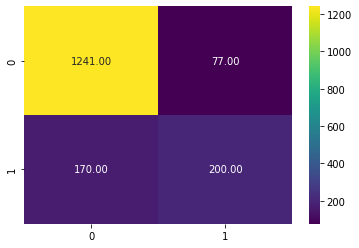

In [79]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

#printing accuracy
print('Training accuracy',lr.score(x_train,y_train))
acc_lr=accuracy_score(y_test,pred_lr)
print('Testing accuracy',acc_lr)

#classification report
print(classification_report(y_test,pred_lr))

#confusion matrix
cm=confusion_matrix(y_test,pred_lr)
sns.heatmap(cm,annot=True,fmt='.2f',cmap='viridis');

<h3>Decision Tree Classifier

Training accuracy 1.0
Testing accuracy 0.7648104265402843
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1318
           1       0.47      0.51      0.49       370

    accuracy                           0.76      1688
   macro avg       0.66      0.67      0.67      1688
weighted avg       0.77      0.76      0.77      1688



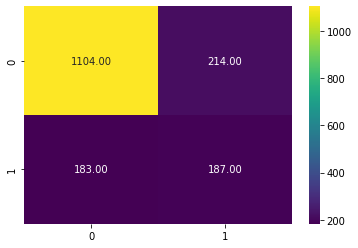

In [78]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

#printing accuracy
print('Training accuracy',dtc.score(x_train,y_train))
acc_dtc=accuracy_score(y_test,pred_dtc)
print('Testing accuracy',acc_dtc)

#classification report
print(classification_report(y_test,pred_dtc))

#confusion matrix
cm=confusion_matrix(y_test,pred_dtc)
sns.heatmap(cm,annot=True,fmt='.2f',cmap='viridis');

<h3>Random Forest Classifier

Training accuracy 0.9998025276461295
Testing accuracy 0.8430094786729858
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1318
           1       0.71      0.49      0.58       370

    accuracy                           0.84      1688
   macro avg       0.79      0.71      0.74      1688
weighted avg       0.83      0.84      0.83      1688



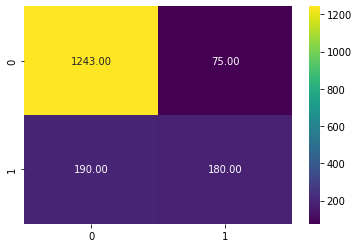

In [89]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)

#printing accuracy
print('Training accuracy',rf.score(x_train,y_train))
acc_rf=accuracy_score(y_test,pred_rf)
print('Testing accuracy',acc_rf)

#classification report
print(classification_report(y_test,pred_rf))

#confusion matrix
cm=confusion_matrix(y_test,pred_rf)
sns.heatmap(cm,annot=True,fmt='.2f',cmap='viridis');

<h3>Gaussian Naive Bayes

Training accuracy 0.7837677725118484
Testing accuracy 0.7855450236966824
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1318
           1       0.51      0.68      0.58       370

    accuracy                           0.79      1688
   macro avg       0.70      0.75      0.72      1688
weighted avg       0.81      0.79      0.80      1688



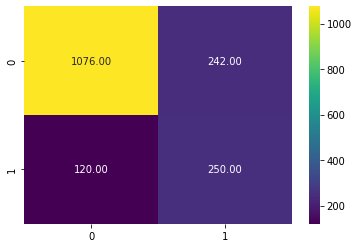

In [76]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb=gnb.predict(x_test)

#printing accuracy
print('Training accuracy',gnb.score(x_train,y_train))
acc_gnb=accuracy_score(y_test,pred_gnb)
print('Testing accuracy',acc_gnb)

#classification report
print(classification_report(y_test,pred_gnb))

#confusion matrix
cm=confusion_matrix(y_test,pred_gnb)
sns.heatmap(cm,annot=True,fmt='.2f',cmap='viridis');

<h3>Support Vector Classifier

Training accuracy 0.8388625592417062
Testing accuracy 0.8483412322274881
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1318
           1       0.76      0.45      0.57       370

    accuracy                           0.85      1688
   macro avg       0.81      0.71      0.74      1688
weighted avg       0.84      0.85      0.83      1688



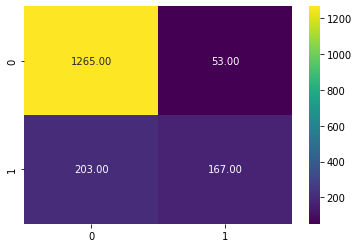

In [75]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)

#printing accuracy
print('Training accuracy',svc.score(x_train,y_train))
acc_svc=accuracy_score(y_test,pred_svc)
print('Testing accuracy',acc_svc)

#classification report
print(classification_report(y_test,pred_svc))

#confusion matrix
cm=confusion_matrix(y_test,pred_svc)
sns.heatmap(cm,annot=True,fmt='.2f',cmap='viridis');

<h3>KNeighbors Classifier

Training accuracy 0.8635466034755134
Testing accuracy 0.8169431279620853
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1318
           1       0.63      0.39      0.48       370

    accuracy                           0.82      1688
   macro avg       0.74      0.66      0.69      1688
weighted avg       0.80      0.82      0.80      1688



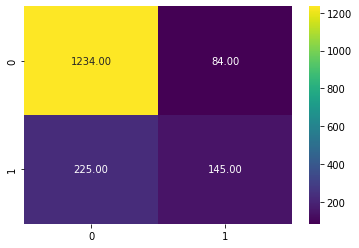

In [80]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

#printing accuracy
print('Training accuracy',knn.score(x_train,y_train))
acc_knn=accuracy_score(y_test,pred_knn)
print('Testing accuracy',acc_knn)

#classification report
print(classification_report(y_test,pred_knn))

#confusion matrix
cm=confusion_matrix(y_test,pred_knn)
sns.heatmap(cm,annot=True,fmt='.2f',cmap='viridis');

<H2>Cross Validation

In [90]:
from sklearn.model_selection import cross_val_score

models=[lr,dtc,rf,gnb,svc,knn]
accuracy=[acc_lr,acc_dtc,acc_rf,acc_gnb,acc_svc,acc_knn]
CV=[]
for i in models:
    cv=cross_val_score(i,x,y,cv=5)
    CV.append(cv.mean())

In [91]:
classification=pd.DataFrame()
classification['Model']=models
classification['Accuracy']=accuracy
classification['CV score']=CV
classification['Difference']=[accuracy[0]-CV[0],accuracy[1]-CV[1],accuracy[2]-CV[2],accuracy[3]-CV[3],accuracy[4]-CV[4],
                             accuracy[5]-CV[5]]
classification

,Model,Accuracy,CV score,Difference
0,LogisticRegression(),0.853673,0.827754,0.025919
1,DecisionTreeClassifier(),0.764810,0.717879,0.046931
2,"(DecisionTreeClassifier(max_features='auto', r...",0.843009,0.821684,0.021326
3,GaussianNB(),0.785545,0.779325,0.006220
4,SVC(),0.848341,0.823756,0.024586
5,KNeighborsClassifier(),0.816943,0.790579,0.026364


In [98]:
classification.sort_values(by='Difference')

,Model,Accuracy,CV score,Difference
3,GaussianNB(),0.785545,0.779325,0.006220
2,"(DecisionTreeClassifier(max_features='auto', r...",0.843009,0.821684,0.021326
4,SVC(),0.848341,0.823756,0.024586
0,LogisticRegression(),0.853673,0.827754,0.025919
5,KNeighborsClassifier(),0.816943,0.790579,0.026364
1,DecisionTreeClassifier(),0.764810,0.717879,0.046931


From above cross validation __Gaussian Naive Bayes__ have least difference.

<h3>Hyper parameter Tuning

In [101]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

GCV=GridSearchCV(GaussianNB(),param_grid,verbose=1,cv=10,n_jobs=-1)
GCV.fit(x_train,y_train)

print(GCV.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 0.08111308307896872}


In [102]:
final_model=GaussianNB(var_smoothing=0.08111308307896872)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Final Accuracy is {}%'.format(acc*100))

Final Accuracy is 82.99763033175356%


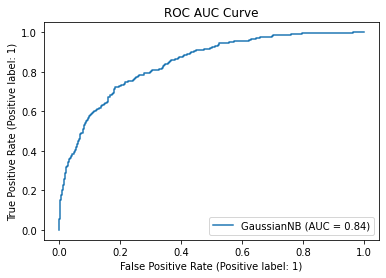

In [138]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_model,x_test,y_test)
plt.title('ROC AUC Curve')
plt.show()

<b>Saving the model

In [103]:
import joblib 
joblib.dump(final_model,'Weather-classification.pkl')

['Weather-classification.pkl']

<h3>Regression model for Rainfall as dependent variable

In [105]:
#splitting data into dependent and independent features
X=df.drop('Rainfall',axis=1)
Y=df['Rainfall']

<b>Checking VIF values to solve Multicollinearity

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,8.672733,MinTemp
1,26.386022,MaxTemp
2,1.437314,Evaporation
3,2.117497,Sunshine
4,3.014529,WindGustDir
5,2.270662,WindGustSpeed
6,2.930675,WindDir9am
7,2.919908,WindDir3pm
8,2.036007,WindSpeed9am
9,1.908337,WindSpeed3pm


The vif values are more than 10 in some columns.I will drop the column with highest vif value.

In [108]:
X.drop('Temp3pm',axis=1,inplace=True)

In [109]:
#checking vif values again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,8.597680,MinTemp
1,9.717399,MaxTemp
2,1.433737,Evaporation
3,2.117103,Sunshine
4,3.013664,WindGustDir
5,2.263340,WindGustSpeed
6,2.929497,WindDir9am
7,2.917366,WindDir3pm
8,2.034423,WindSpeed9am
9,1.901033,WindSpeed3pm


Still some vif values for some column are more than 10.Dropping column highest vif values.

In [110]:
X.drop('Pressure9am',axis=1,inplace=True)

In [112]:
#checking again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,8.513275,MinTemp
1,9.191765,MaxTemp
2,1.415713,Evaporation
3,2.091593,Sunshine
4,3.012115,WindGustDir
5,2.251405,WindGustSpeed
6,2.929450,WindDir9am
7,2.896959,WindDir3pm
8,2.031403,WindSpeed9am
9,1.884678,WindSpeed3pm


In [113]:
#dropping column with highest vif value and checking again
X.drop('Temp9am',axis=1,inplace=True)
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns

vif

,VIF values,Features
0,4.460302,MinTemp
1,5.371578,MaxTemp
2,1.405649,Evaporation
3,2.053941,Sunshine
4,3.012074,WindGustDir
5,2.227314,WindGustSpeed
6,2.925197,WindDir9am
7,2.889856,WindDir3pm
8,2.000372,WindSpeed9am
9,1.833823,WindSpeed3pm


The VIF value is less than 10 in all the features which means we have solved the multicollinearity problem. Now we can move to model building

<h3>Model Building

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

<b>Finding best random state

In [116]:
LR=LinearRegression()
maxAccu=0
maxRS=0
for i in range(0,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=i)
    LR.fit(X_train,Y_train)
    pred=LR.predict(X_test)
    acc=r2_score(Y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best random state is ',maxRS,'with accuracy ',maxAccu)

Best random state is  184 with accuracy  0.8682271756039974


In [117]:
#creaating train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=186)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5064, 17)
(1688, 17)
(5064,)
(1688,)


In [131]:
CV_S=[]
r2=[]

<h3>Linear Regression

In [132]:
LR=LinearRegression()
LR.fit(X_train,Y_train)

#prediction
pred_LR=LR.predict(X_test)
r2_=r2_score(Y_test,pred_LR)
r2.append(r2_)
print('R2 Score:',r2_)
print('MAE:',mean_absolute_error(Y_test,pred_LR))
print('MSE:',mean_squared_error(Y_test,pred_LR))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,pred_LR)))

#checking cv score for linear regression
cv_=cross_val_score(LR,x,y,cv=5).mean()
print('Cross-validation score :',cv_)
CV_S.append(cv_)

R2 Score: 0.8225963653933599
MAE: 0.22734015617262984
MSE: 0.17199500218552588
RMSE: 0.41472280162239195
Cross-validation score : 0.3081015962564889


<h3>Random Forest Regressor

In [133]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

#prediction
pred_RF=RF.predict(X_test)
r2_=r2_score(Y_test,pred_RF)
r2.append(r2_)
print('R2 Score:',r2_)
print('MAE:',mean_absolute_error(Y_test,pred_RF))
print('MSE:',mean_squared_error(Y_test,pred_RF))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,pred_RF)))

#checking cv score for linear regression
cv_=cross_val_score(RF,x,y,cv=5).mean()
print('Cross-validation score :',cv_)
CV_S.append(cv_)

R2 Score: 0.8291358228768037
MAE: 0.22632131267348404
MSE: 0.1656549178538209
RMSE: 0.40700727002575876
Cross-validation score : 0.28944501560173963


<h3>KNeighbors Regressor

In [134]:
KNN=KNeighborsRegressor()
KNN.fit(X_train,Y_train)

#prediction
pred_KNN=KNN.predict(X_test)
r2_=r2_score(Y_test,pred_KNN)
r2.append(r2_)
print('R2 Score:',r2_)
print('MAE:',mean_absolute_error(Y_test,pred_KNN))
print('MSE:',mean_squared_error(Y_test,pred_KNN))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,pred_KNN)))

#checking cv score for linear regression
cv_=cross_val_score(KNN,x,y,cv=5).mean()
print('Cross-validation score :',cv_)
CV_S.append(cv_)

R2 Score: 0.37419411778571365
MAE: 0.5146816044096292
MSE: 0.6067264874128593
RMSE: 0.7789264967972648
Cross-validation score : 0.14344871961568417


<h3>Support Vector Regressor

In [135]:
svr=SVR()
svr.fit(X_train,Y_train)

#prediction
pred_svr=svr.predict(X_test)
r2_=r2_score(Y_test,pred_svr)
r2.append(r2_)
print('R2 Score:',r2_)
print('MAE:',mean_absolute_error(Y_test,pred_svr))
print('MSE:',mean_squared_error(Y_test,pred_svr))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,pred_svr)))

#checking cv score for linear regression
cv_=cross_val_score(svr,x,y,cv=5).mean()
print('Cross-validation score :',cv_)
CV_S.append(cv_)

R2 Score: 0.8134640996789646
MAE: 0.22395948139070807
MSE: 0.18084884593562126
RMSE: 0.42526326661918645
Cross-validation score : 0.2912376603483347


<h3>SGD Regressor

In [136]:
sg=SGDRegressor()
sg.fit(X_train,Y_train)

#prediction
pred_sg=sg.predict(X_test)
r2_=r2_score(Y_test,pred_sg)
r2.append(r2_)
print('R2 Score:',r2_)
print('MAE:',mean_absolute_error(Y_test,pred_sg))
print('MSE:',mean_squared_error(Y_test,pred_sg))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,pred_sg)))

#checking cv score for linear regression
cv_=cross_val_score(sg,x,y,cv=5).mean()
print('Cross-validation score :',cv_)
CV_S.append(cv_)

R2 Score: 0.8163509388818897
MAE: 0.239240603855943
MSE: 0.1780500198793384
RMSE: 0.4219597372728095
Cross-validation score : 0.28034201012905186


<h3>Lasso

In [144]:
ls=Lasso()
ls.fit(X_train,Y_train)

#prediction
pred_ls=ls.predict(X_test)
r2_=r2_score(Y_test,pred_ls)
r2.append(r2_)
print('R2 Score:',r2_)
print('MAE:',mean_absolute_error(Y_test,pred_ls))
print('MSE:',mean_squared_error(Y_test,pred_ls))
print('RMSE:',np.sqrt(mean_squared_error(Y_test,pred_ls)))

#checking cv score for linear regression
cv_=cross_val_score(ls,x,y,cv=5).mean()
print('Cross-validation score :',cv_)
CV_S.append(cv_)

R2 Score: -0.0003159182457812548
MAE: 0.8225729044683973
MSE: 0.9698185661550124
RMSE: 0.9847936667927005
Cross-validation score : -0.004879800238143206


<h2>Cross Validation

In [141]:
model=[LR,RF,KNN,svr,sg,ls]
regression=pd.DataFrame()
regression['Model']=model
regression['R2 Score']=r2
regression['CV Score']=CV_S
regression['Difference']=[r2[0]-CV_S[0],r2[1]-CV_S[1],r2[2]-CV_S[2],r2[3]-CV_S[3],r2[4]-CV_S[4],r2[5]-CV_S[5]]
regression.sort_values(by='Difference')

,Model,R2 Score,CV Score,Difference
5,Lasso(),-0.000316,-0.004880,0.004564
2,KNeighborsRegressor(),0.374194,0.143449,0.230745
0,LinearRegression(),0.822596,0.308102,0.514495
3,SVR(),0.813464,0.291238,0.522226
4,SGDRegressor(),0.816351,0.280342,0.536009
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.829136,0.289445,0.539691


From above cross validation Linear Regression is best model.

I've Skipped hyperparameter tuning as there are no such parameters in linear regression to tune.

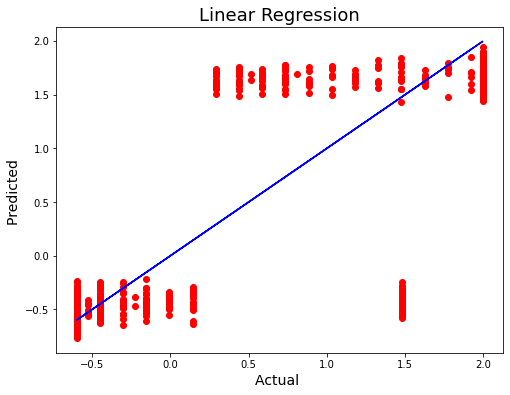

In [147]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test,pred_LR,color='r')
plt.plot(Y_test,Y_test,color='b')
plt.xlabel('Actual ',fontsize=14)
plt.ylabel('Predicted ',fontsize=14)
plt.title('Linear Regression' ,fontsize=18)
plt.show()

<b>Saving The model

In [149]:
joblib.dump(LR,'Weather-regression.pkl')

['Weather-regression.pkl']